In [41]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
from scipy import stats
def linr(a,b):
    slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)
    return r_value  # slope or r_value

In [42]:
nino = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\nino3.4.nc')

nino34 = nino.sst.loc['1982-01-01':'2021-02-01']
nino34 = nino34.resample(time ="M").mean(dim="time")


#chazhi_nino34 = nino34.value
nino34month = nino34.resample(time='QS-DEC').mean(dim="time")
ninoDJF=nino34month[4::4]
ninoDJF['time']=ninoDJF['time.year']
ninoDJF=ninoDJF.rename({'time': 'Year'})

# ninoDJF from 1982_12 1 2 to 2021_12 1 2

ds = ninoDJF
climatology_mean = ds.mean("Year")
climatology_std = ds.std("Year")
stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds,
    climatology_mean,
    climatology_std,
)




In [43]:
sgl= (1983,1984, 1988,1989, 1995,1996, 1998,1989, 2005,2006, 2007,2008, 2010,2011, 2016,2017)
sgl = np.array(sgl,dtype = 'int32')
sgl =sgl -1982
nino34 = stand_anomalies[sgl]
t = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)
t = np.array(t,dtype = 'int32')
nino34['Year'] = t

In [44]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\Monday\correction.nc')
ds = f.__xarray_dataarray_variable__

nds = ds.loc[:,5:-5.1,:]

varnds = nds.rolling(time = 91, center = True).var().dropna("time")

a = varnds.values
b = np.sqrt(a)
lat = varnds['lat']
lon = varnds['lon']
time = varnds['time']

sqrtvar = xr.DataArray(b,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])

a =sqrtvar.mean(axis=1)



OLRa = a.resample(time ="M").mean(dim="time")

OLR = OLRa.groupby("time.month")



In [45]:
OLR2 = OLR[2]
OLR2['time']=OLR2['time.year']
OLR2=OLR2.rename({'time': 'Year'})
OLR2 = OLR2[sgl]
OLR2['Year'] = t

result2 = np.apply_along_axis(lambda OLR2: linr(OLR2, nino34), axis=0, arr=OLR2)

reg02 =  xr.DataArray(result2, coords= [OLR2.lon]) #converts the output to an xarray DataArray

In [46]:
OLR3 = OLR[3]
OLR3['time']=OLR3['time.year']
OLR3=OLR3.rename({'time': 'Year'})
OLR3 = OLR3[sgl]
OLR3['Year'] = t

result3 = np.apply_along_axis(lambda OLR3: linr(OLR3, nino34), axis=0, arr=OLR3)

reg03=  xr.DataArray(result3, coords= [OLR2.lon],name = 'reg03')

In [47]:
OLR4 = OLR[4]
OLR4['time']=OLR4['time.year']
OLR4=OLR4.rename({'time': 'Year'})
OLR4 = OLR4[sgl]
OLR4['Year'] = t

result4 = np.apply_along_axis(lambda OLR4: linr(OLR4, nino34), axis=0, arr=OLR4)
#result4 = result.reshape(1,144)
reg04 =  xr.DataArray(result4, coords= [OLR2.lon],name = 'reg04')


In [48]:
OLR5 = OLR[5]
OLR5['time']=OLR5['time.year']
OLR5=OLR5.rename({'time': 'Year'})
OLR5 = OLR5[sgl]
OLR5['Year'] = t

result5 = np.apply_along_axis(lambda OLR5: linr(OLR5, nino34), axis=0, arr=OLR5)
#result5 = result.reshape(1,144)
reg05 =  xr.DataArray(result5, coords= [OLR2.lon],name = 'reg05')

In [49]:
OLR6 = OLR[6]
OLR6['time']=OLR6['time.year']
OLR6=OLR6.rename({'time': 'Year'})
OLR6 = OLR6[sgl]
OLR6['Year'] = t

result6 = np.apply_along_axis(lambda OLR6: linr(OLR6, nino34), axis=0, arr=OLR6)
#result6 = result.reshape(1,144)
reg06 =  xr.DataArray(result6, coords= [OLR2.lon],name = 'reg06')

In [50]:
OLR7 = OLR[7]
OLR7['time']=OLR7['time.year']
OLR7=OLR7.rename({'time': 'Year'})
OLR7 = OLR7[sgl]
OLR7['Year'] = t

result7 = np.apply_along_axis(lambda OLR7: linr(OLR7, nino34), axis=0, arr=OLR7)
#result7 = result.reshape(1,144)
reg07 =  xr.DataArray(result7,coords= [OLR2.lon],name = 'reg07')

In [51]:
OLR8 = OLR[8]
OLR8['time']=OLR8['time.year']
OLR8=OLR8.rename({'time': 'Year'})
OLR8 = OLR8[sgl]
OLR8['Year'] = t

result8 = np.apply_along_axis(lambda OLR8: linr(OLR8, nino34), axis=0, arr=OLR8)
#result8 = result.reshape(1,144)
reg08 =  xr.DataArray(result8, coords= [OLR2.lon],name = 'reg08')

In [52]:
OLR9 = OLR[9]
OLR9['time']=OLR9['time.year']
OLR9=OLR9.rename({'time': 'Year'})
OLR9 = OLR9[sgl]
OLR9['Year'] = t

result9 = np.apply_along_axis(lambda OLR9: linr(OLR9, nino34), axis=0, arr=OLR9)
#result9 = result.reshape(1,144)
reg09 =  xr.DataArray(result9, coords= [OLR2.lon],name = 'reg09')

In [53]:
OLR10 = OLR[10]
OLR10['time']=OLR10['time.year']
OLR10=OLR10.rename({'time': 'Year'})
OLR10 = OLR10[sgl]
OLR10['Year'] = t

result10 = np.apply_along_axis(lambda OLR10: linr(OLR10, nino34), axis=0, arr=OLR10)
#result10 = result.reshape(1,144)
reg10 =  xr.DataArray(result10,coords= [OLR2.lon],name = 'reg10')

In [54]:
OLR11 = OLR[11]
OLR11['time']=OLR11['time.year']
OLR11=OLR11.rename({'time': 'Year'})
OLR11 = OLR11[sgl]
OLR11['Year'] = t

result11 = np.apply_along_axis(lambda OLR11: linr(OLR11, nino34), axis=0, arr=OLR11)
#result11 = result.reshape(1,144)
reg11 =  xr.DataArray(result11, coords= [OLR2.lon],name = 'reg11')

In [55]:
OLR12 = OLR[12]
OLR12['time']=OLR12['time.year']
OLR12=OLR12.rename({'time': 'Year'})
OLR12 = OLR12[sgl]
OLR12['Year'] = t
result12 = np.apply_along_axis(lambda OLR12: linr(OLR12, nino34), axis=0, arr=OLR12)
#result12 = result.reshape(1,144)
reg12 =  xr.DataArray(result12, coords= [OLR2.lon],name = 'reg12')

In [56]:
test = xr.DataArray([result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12],
        dims=("time", "lon"), coords={"time": ['Feb(0)','Mar(0)','Apr(0)','May(0)','Jun(0)','Jul(0)','Aug(0)','Sept(0)','Oct(0)','Nov(0)','Dec(0)'], "lon": OLR2.lon},name = 'reg')

test.max()

<xarray.DataArray 'reg' ()>
array(0.6692663)

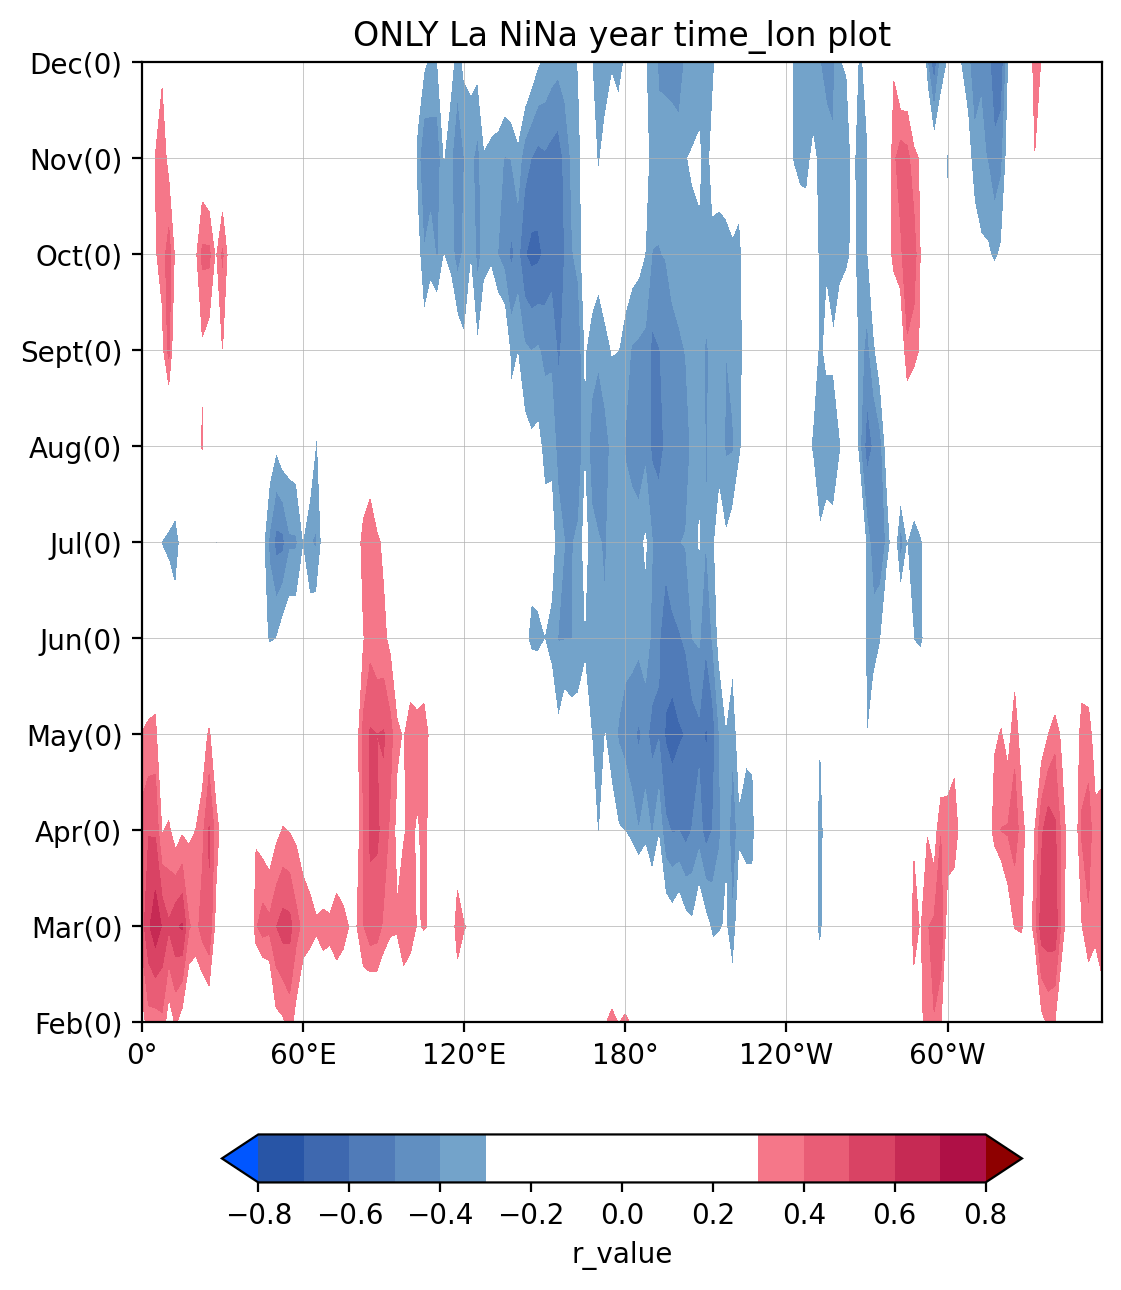

In [57]:
import matplotlib.colors as colors
import matplotlib as mpl
colors = [ '#2855a6','#3e68af', '#507bb8', '#618fc1', '#73a3ca', '#ffffff', '#ffffff', 
          '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#f57789', 
          '#e95d76', '#d94364', '#c62a54', '#af1046']#this is a blue white red colorbar
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("#0056FF") #this is to have arrows at the beginning and end i.e. extend='both'
cmap.set_over("#8E0000")
norm = mpl.colors.Normalize(vmin=-0.8,vmax=0.8)
levels = np.linspace(-0.8,0.8,17)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 

lon_formatter = cticker.LongitudeFormatter()

fig = plt.figure(figsize=[8,8],dpi=200,facecolor='white')
ax = fig.add_axes([0.1, 0.2, 0.6, 0.6])
ax.set_xticks(range(0,360,60))
ax.xaxis.set_major_formatter(lon_formatter)
ax.title.set_text('ONLY La NiNa year time_lon plot')

c = ax.contourf(test.lon, test.time, test,
                levels=levels,
                norm=norm, 
                extend='both' ,
                cmap=cmap
               )
plt.grid(linewidth=0.25)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.1, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'r_value', 
             ticks=np.arange(-0.8,0.81,0.2),
             shrink=0.7)

